In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import RandomizedSearchCV
pd.set_option('display.float_format', lambda x: '%0.3f' % x)
pd.set_option('display.max_columns',100)
pd.set_option('display.max_rows',1000)
import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv('_out_4w_12_21_ver2.csv')

In [3]:
df.head()

,UniqueSerialNo,MAKE_NAME,Make_Clean,Model,Model_Clean,Variant,Variant_Clean,Fuel Type,Fuel_Clean,SOLD_DATE,MAKE YEAR,SOLD AMOUNT,4W_State_Clean
0,S14062500378,TATA,TATA,SUMO VICTA,SUMOVICTA,LX,lx,Diesel,DIESEL,19-08-2015 00:00,2008,150000,Andhra Pradesh
1,S15071100272,MAHINDRA,MAHINDRA,BOLERO,BOLERO,SLX,slx,Diesel,DIESEL,26-12-2015 00:00,2008,261000,Andhra Pradesh
2,S15103000131,TATA,TATA,INDICA VISTA,INDICAVISTA,AQUA 1.4 TDI,aqua1.4tdi,Diesel,DIESEL,08-01-2016 00:00,2010,152000,Andhra Pradesh
3,S15090300123,TATA,TATA,INDICA VISTA,INDICAVISTA,TERRA QUADRAJET,terraquadrajetbsiii,Diesel,DIESEL,08-01-2016 00:00,2009,114000,Andhra Pradesh
4,S15111900409,MARUTI,MARUTI SUZUKI,800,800,STD BS-III,stdbsiii,Petrol,PETROL,10-02-2016 00:00,2002,35000,Andhra Pradesh


In [4]:
df2=df.copy()

In [5]:
df2.shape

(206198, 13)

In [6]:
data=df2.drop(['MAKE_NAME','UniqueSerialNo','Model','Variant','Fuel Type'],axis=1)

In [7]:
data

,Make_Clean,Model_Clean,Variant_Clean,Fuel_Clean,SOLD_DATE,MAKE YEAR,SOLD AMOUNT,4W_State_Clean
0,TATA,SUMOVICTA,lx,DIESEL,19-08-2015 00:00,2008,150000,Andhra Pradesh
1,MAHINDRA,BOLERO,slx,DIESEL,26-12-2015 00:00,2008,261000,Andhra Pradesh
2,TATA,INDICAVISTA,aqua1.4tdi,DIESEL,08-01-2016 00:00,2010,152000,Andhra Pradesh
3,TATA,INDICAVISTA,terraquadrajetbsiii,DIESEL,08-01-2016 00:00,2009,114000,Andhra Pradesh
4,MARUTI SUZUKI,800,stdbsiii,PETROL,10-02-2016 00:00,2002,35000,Andhra Pradesh
...,...,...,...,...,...,...,...,...
206193,MARUTI SUZUKI,ALTO800,LXI,PETROL,12/31/2019,2015,140000,Kerala
206194,NISSAN,NaN,NAN,NaN,26-02-2018 00:00,2015,260000,Karnataka
206195,TOYOTA,COROLLA ALTIS,J,Petrol,8/27/2019,2008,190000,Karnataka
206196,TATA,INDICAV2,DLG,DIESEL,18-01-2020 00:00,2016,50000,Karnataka


In [8]:
data.rename(columns={'Make_Clean':'Make','Model_Clean':'Model','Variant_Clean':'Variant','Fuel_Clean':'FUEL TYPE_CLEANED','4W_State_Clean':'STATE_MAPPED'},inplace=True)

In [9]:
data.head(2)

,Make,Model,Variant,FUEL TYPE_CLEANED,SOLD_DATE,MAKE YEAR,SOLD AMOUNT,STATE_MAPPED
0,TATA,SUMOVICTA,lx,DIESEL,19-08-2015 00:00,2008,150000,Andhra Pradesh
1,MAHINDRA,BOLERO,slx,DIESEL,26-12-2015 00:00,2008,261000,Andhra Pradesh


In [10]:
def uppper(df,col):
    df[col]=df[col].str.upper()
    df[col]=df[col].str.replace(' ','')
    return df[col]

In [11]:
def encoding(data,col,col_1,model):
    print(model.head())
    temp = pd.read_csv(data+'.csv',encoding='CP1252')
    temp[col]=uppper(temp,col)
    model_temp = pd.DataFrame()
    labels_temp_map = dict(zip(temp[col],temp['Id (Encoding)']))
    model_temp[col_1] = model[col_1].map(labels_temp_map)
    print(model.head())
    return model_temp[col_1]

In [12]:
def df_reset(df):
    return pd.DataFrame()

In [13]:
data.rename(columns={'Make':'Make_Clean'},inplace=True)
data.rename(columns={'Model':'Model_Clean'},inplace=True)
data.rename(columns={'Variant':'Variant_Clean'},inplace=True)

In [14]:
data.rename(columns={'FUEL TYPE_CLEANED':'Fuel_Clean'},inplace=True)
data.rename(columns={'STATE_MAPPED':'CV_State_Clean'},inplace=True)
data.rename(columns={'MAKE YEAR':'MAKE_YEAR'},inplace=True)

In [15]:
data['Make_Clean']=uppper(data,'Make_Clean')
data['Model_Clean']=uppper(data,'Model_Clean')
data['Variant_Clean']=uppper(data,'Variant_Clean')
data['Fuel_Clean']=uppper(data,'Fuel_Clean')
data['CV_State_Clean']=uppper(data,'CV_State_Clean')

In [16]:
data.isnull().sum() * 100 / len(data)

Make_Clean       0.001
Model_Clean      0.044
Variant_Clean    1.357
Fuel_Clean       2.874
SOLD_DATE        0.000
MAKE_YEAR        0.000
SOLD AMOUNT      0.000
CV_State_Clean   0.751
dtype: float64

In [17]:
dt = data.dropna(how='any',axis=0,subset=['Model_Clean','Fuel_Clean','Variant_Clean','Make_Clean','CV_State_Clean'])

In [18]:
dt

,Make_Clean,Model_Clean,Variant_Clean,Fuel_Clean,SOLD_DATE,MAKE_YEAR,SOLD AMOUNT,CV_State_Clean
0,TATA,SUMOVICTA,LX,DIESEL,19-08-2015 00:00,2008,150000,ANDHRAPRADESH
1,MAHINDRA,BOLERO,SLX,DIESEL,26-12-2015 00:00,2008,261000,ANDHRAPRADESH
2,TATA,INDICAVISTA,AQUA1.4TDI,DIESEL,08-01-2016 00:00,2010,152000,ANDHRAPRADESH
3,TATA,INDICAVISTA,TERRAQUADRAJETBSIII,DIESEL,08-01-2016 00:00,2009,114000,ANDHRAPRADESH
4,MARUTISUZUKI,800,STDBSIII,PETROL,10-02-2016 00:00,2002,35000,ANDHRAPRADESH
...,...,...,...,...,...,...,...,...
206189,FORCEMOTORS,TOOFANTRAX,DI11STR,DIESEL,12/31/2019,2013,128000,ANDHRAPRADESH
206193,MARUTISUZUKI,ALTO800,LXI,PETROL,12/31/2019,2015,140000,KERALA
206195,TOYOTA,COROLLAALTIS,J,PETROL,8/27/2019,2008,190000,KARNATAKA
206196,TATA,INDICAV2,DLG,DIESEL,18-01-2020 00:00,2016,50000,KARNATAKA


In [19]:
dt['Fuel_Clean'].unique()

array(['DIESEL', 'PETROL', 'LPG', 'CNG'], dtype=object)

In [20]:
dt['MMV']= dt['Make_Clean']+'_'+dt['Model_Clean']+'_'+dt['Variant_Clean']

In [21]:
df_1= dt.copy()

In [22]:
df_1.shape

(198047, 9)

In [23]:
df_1.describe()

,MAKE_YEAR,SOLD AMOUNT
count,198047.000,198047.000
mean,2009.192,148531.611
std,20.110,123702.722
min,0.000,145.000
25%,2007.000,60000.000
50%,2010.000,113000.000
75%,2012.000,200000.000
max,2019.000,2935000.000


In [24]:
df_1['SOLD AMOUNT'].max()

2935000

In [25]:
#Sampling
df_2 = df_1[df_1['SOLD AMOUNT']>=145] 

In [26]:
df_2.shape

(198047, 9)

In [27]:
df_3 = df_2[df_2['MMV'].map(df_2['MMV'].value_counts()) >=10]

In [28]:
df_3.shape

(196386, 9)

In [29]:
df_3

,Make_Clean,Model_Clean,Variant_Clean,Fuel_Clean,SOLD_DATE,MAKE_YEAR,SOLD AMOUNT,CV_State_Clean,MMV
0,TATA,SUMOVICTA,LX,DIESEL,19-08-2015 00:00,2008,150000,ANDHRAPRADESH,TATA_SUMOVICTA_LX
1,MAHINDRA,BOLERO,SLX,DIESEL,26-12-2015 00:00,2008,261000,ANDHRAPRADESH,MAHINDRA_BOLERO_SLX
2,TATA,INDICAVISTA,AQUA1.4TDI,DIESEL,08-01-2016 00:00,2010,152000,ANDHRAPRADESH,TATA_INDICAVISTA_AQUA1.4TDI
3,TATA,INDICAVISTA,TERRAQUADRAJETBSIII,DIESEL,08-01-2016 00:00,2009,114000,ANDHRAPRADESH,TATA_INDICAVISTA_TERRAQUADRAJETBSIII
4,MARUTISUZUKI,800,STDBSIII,PETROL,10-02-2016 00:00,2002,35000,ANDHRAPRADESH,MARUTISUZUKI_800_STDBSIII
...,...,...,...,...,...,...,...,...,...
206189,FORCEMOTORS,TOOFANTRAX,DI11STR,DIESEL,12/31/2019,2013,128000,ANDHRAPRADESH,FORCEMOTORS_TOOFANTRAX_DI11STR
206193,MARUTISUZUKI,ALTO800,LXI,PETROL,12/31/2019,2015,140000,KERALA,MARUTISUZUKI_ALTO800_LXI
206195,TOYOTA,COROLLAALTIS,J,PETROL,8/27/2019,2008,190000,KARNATAKA,TOYOTA_COROLLAALTIS_J
206196,TATA,INDICAV2,DLG,DIESEL,18-01-2020 00:00,2016,50000,KARNATAKA,TATA_INDICAV2_DLG


In [30]:
df_1 =df_reset(df_1)

In [31]:
df_2 = df_reset(df_2)

In [32]:
df = df_3.copy()

In [33]:
#Data Preprocessing
df_1 = df[df['MAKE_YEAR']>=2005]

In [34]:
df_1.shape

(175497, 9)

In [35]:
df_1

,Make_Clean,Model_Clean,Variant_Clean,Fuel_Clean,SOLD_DATE,MAKE_YEAR,SOLD AMOUNT,CV_State_Clean,MMV
0,TATA,SUMOVICTA,LX,DIESEL,19-08-2015 00:00,2008,150000,ANDHRAPRADESH,TATA_SUMOVICTA_LX
1,MAHINDRA,BOLERO,SLX,DIESEL,26-12-2015 00:00,2008,261000,ANDHRAPRADESH,MAHINDRA_BOLERO_SLX
2,TATA,INDICAVISTA,AQUA1.4TDI,DIESEL,08-01-2016 00:00,2010,152000,ANDHRAPRADESH,TATA_INDICAVISTA_AQUA1.4TDI
3,TATA,INDICAVISTA,TERRAQUADRAJETBSIII,DIESEL,08-01-2016 00:00,2009,114000,ANDHRAPRADESH,TATA_INDICAVISTA_TERRAQUADRAJETBSIII
5,TATA,INDICAVISTA,TERRAQUADRAJETBSIII,DIESEL,26-02-2016 00:00,2010,140000,ANDHRAPRADESH,TATA_INDICAVISTA_TERRAQUADRAJETBSIII
...,...,...,...,...,...,...,...,...,...
206189,FORCEMOTORS,TOOFANTRAX,DI11STR,DIESEL,12/31/2019,2013,128000,ANDHRAPRADESH,FORCEMOTORS_TOOFANTRAX_DI11STR
206193,MARUTISUZUKI,ALTO800,LXI,PETROL,12/31/2019,2015,140000,KERALA,MARUTISUZUKI_ALTO800_LXI
206195,TOYOTA,COROLLAALTIS,J,PETROL,8/27/2019,2008,190000,KARNATAKA,TOYOTA_COROLLAALTIS_J
206196,TATA,INDICAV2,DLG,DIESEL,18-01-2020 00:00,2016,50000,KARNATAKA,TATA_INDICAV2_DLG


In [36]:
df_1.isnull().sum()

Make_Clean        0
Model_Clean       0
Variant_Clean     0
Fuel_Clean        0
SOLD_DATE         0
MAKE_YEAR         0
SOLD AMOUNT       0
CV_State_Clean    0
MMV               0
dtype: int64

In [37]:
df_2=df_1.drop(['MMV','SOLD_DATE'],axis=1)

In [38]:
df_2

,Make_Clean,Model_Clean,Variant_Clean,Fuel_Clean,MAKE_YEAR,SOLD AMOUNT,CV_State_Clean
0,TATA,SUMOVICTA,LX,DIESEL,2008,150000,ANDHRAPRADESH
1,MAHINDRA,BOLERO,SLX,DIESEL,2008,261000,ANDHRAPRADESH
2,TATA,INDICAVISTA,AQUA1.4TDI,DIESEL,2010,152000,ANDHRAPRADESH
3,TATA,INDICAVISTA,TERRAQUADRAJETBSIII,DIESEL,2009,114000,ANDHRAPRADESH
5,TATA,INDICAVISTA,TERRAQUADRAJETBSIII,DIESEL,2010,140000,ANDHRAPRADESH
...,...,...,...,...,...,...,...
206189,FORCEMOTORS,TOOFANTRAX,DI11STR,DIESEL,2013,128000,ANDHRAPRADESH
206193,MARUTISUZUKI,ALTO800,LXI,PETROL,2015,140000,KERALA
206195,TOYOTA,COROLLAALTIS,J,PETROL,2008,190000,KARNATAKA
206196,TATA,INDICAV2,DLG,DIESEL,2016,50000,KARNATAKA


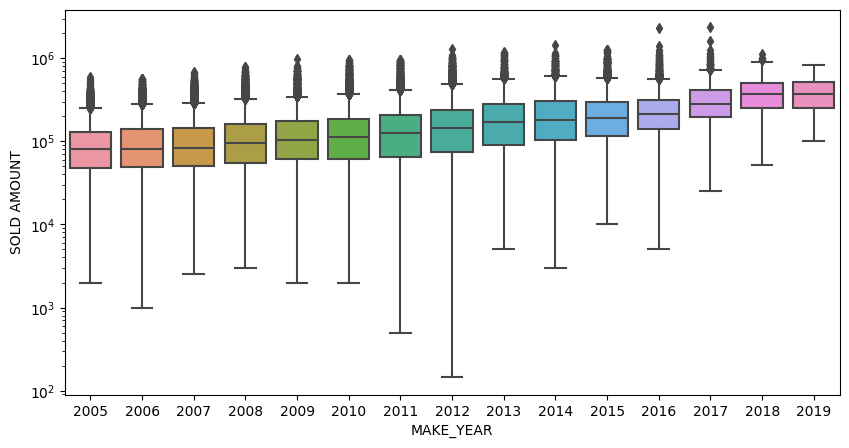

In [39]:
plt.figure(figsize=(10,5))
sns.boxplot(x='MAKE_YEAR',y='SOLD AMOUNT',data=df_2)
plt.yscale('log')
plt.show()

<AxesSubplot:xlabel='SOLD AMOUNT'>

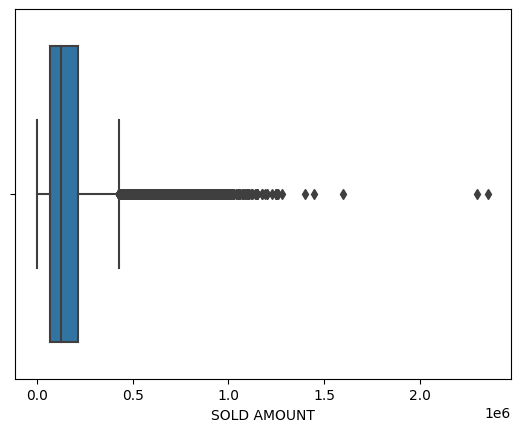

In [40]:
import seaborn as sns
sns.boxplot(x=df_2['SOLD AMOUNT'])

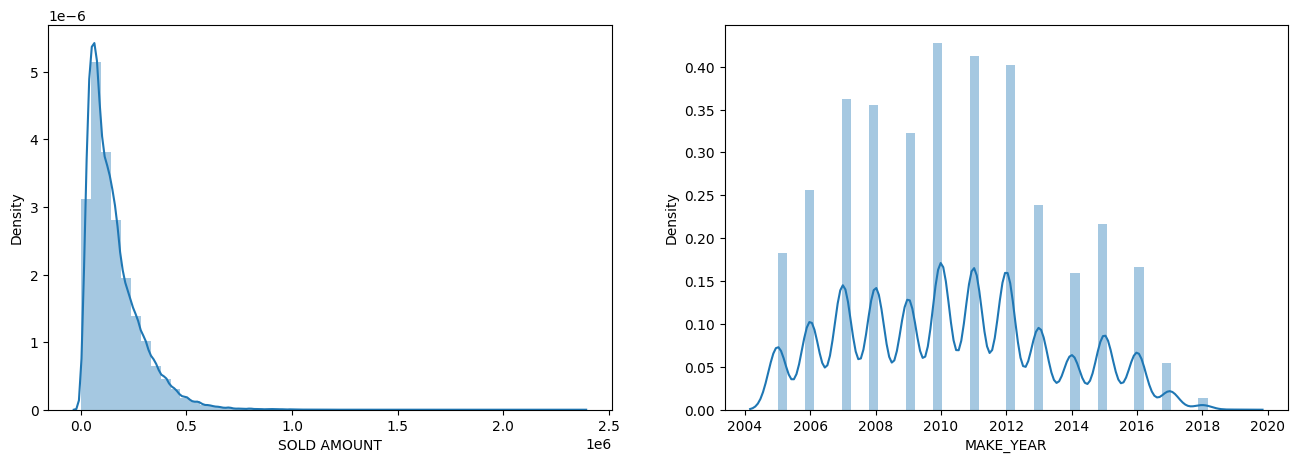

In [41]:
import warnings
warnings.filterwarnings('ignore')
plt.figure(figsize=(16,5))
plt.subplot(1,2,1)
sns.distplot(df_2['SOLD AMOUNT'])
plt.subplot(1,2,2)
sns.distplot(df_2['MAKE_YEAR'])
plt.show()

In [42]:
print("Highest allowed",df_2['SOLD AMOUNT'].mean() + 3*df_2['SOLD AMOUNT'].std())
print("Lowest allowed",df_2['SOLD AMOUNT'].mean() - 3*df_2['SOLD AMOUNT'].std())

Highest allowed 530293.0194409374
Lowest allowed -217788.78740278294


In [43]:
df_2[(df_2['SOLD AMOUNT'] > 530293.01) | (df_2['SOLD AMOUNT'] < -217788.78)]

,Make_Clean,Model_Clean,Variant_Clean,Fuel_Clean,MAKE_YEAR,SOLD AMOUNT,CV_State_Clean
54,SKODA,SUPERB,2.0ELEGANCETDIAT,DIESEL,2010,560000,KERALA
74,TOYOTA,INNOVA,2.5G48STR,DIESEL,2011,675000,KERALA
300,CHEVROLET,TAVERA,NEO3LS10STRBSIV,DIESEL,2013,570000,ANDHRAPRADESH
313,TOYOTA,INNOVA,2.5E,DIESEL,2010,630000,ANDHRAPRADESH
359,MARUTISUZUKI,SWIFT,ZDI,DIESEL,2015,593000,TELANGANA
...,...,...,...,...,...,...,...
204578,FORCEMOTORS,TOOFANTRAX,DI11STR,DIESEL,2018,545000,TELANGANA
204591,FORCEMOTORS,TRAXCRUISER,PS,DIESEL,2016,590000,MAHARASHTRA
205031,MERCEDESBENZ,CLACLASS,CLA200CDISTYLE,DIESEL,2013,1100000,KERALA
205119,FORCEMOTORS,TOOFANTRAX,DI11STR,DIESEL,2016,540000,ANDHRAPRADESH


In [44]:
new_df = df_2[(df_2['SOLD AMOUNT'] < 530293.01) & (df_2['SOLD AMOUNT'] > -217788.78)]
new_df

,Make_Clean,Model_Clean,Variant_Clean,Fuel_Clean,MAKE_YEAR,SOLD AMOUNT,CV_State_Clean
0,TATA,SUMOVICTA,LX,DIESEL,2008,150000,ANDHRAPRADESH
1,MAHINDRA,BOLERO,SLX,DIESEL,2008,261000,ANDHRAPRADESH
2,TATA,INDICAVISTA,AQUA1.4TDI,DIESEL,2010,152000,ANDHRAPRADESH
3,TATA,INDICAVISTA,TERRAQUADRAJETBSIII,DIESEL,2009,114000,ANDHRAPRADESH
5,TATA,INDICAVISTA,TERRAQUADRAJETBSIII,DIESEL,2010,140000,ANDHRAPRADESH
...,...,...,...,...,...,...,...
206189,FORCEMOTORS,TOOFANTRAX,DI11STR,DIESEL,2013,128000,ANDHRAPRADESH
206193,MARUTISUZUKI,ALTO800,LXI,PETROL,2015,140000,KERALA
206195,TOYOTA,COROLLAALTIS,J,PETROL,2008,190000,KARNATAKA
206196,TATA,INDICAV2,DLG,DIESEL,2016,50000,KARNATAKA


In [45]:
upper_limit = new_df['SOLD AMOUNT'].mean() + 3*df['SOLD AMOUNT'].std()
lower_limit = new_df['SOLD AMOUNT'].mean() - 3*df['SOLD AMOUNT'].std()

In [46]:
upper_limit

513792.0750323168

In [47]:
lower_limit

-216506.16039492568

In [48]:
new_df['SOLD AMOUNT'] = np.where(
    new_df['SOLD AMOUNT']>upper_limit,
    upper_limit,
    np.where(
        new_df['SOLD AMOUNT']<lower_limit,
        lower_limit,
        new_df['SOLD AMOUNT']
    )
)

In [49]:
new_df['SOLD AMOUNT'].describe()

count   172886.000
mean    148620.913
std     107580.657
min        145.000
25%      65000.000
50%     120000.000
75%     205000.000
max     513792.075
Name: SOLD AMOUNT, dtype: float64

<AxesSubplot:xlabel='SOLD AMOUNT'>

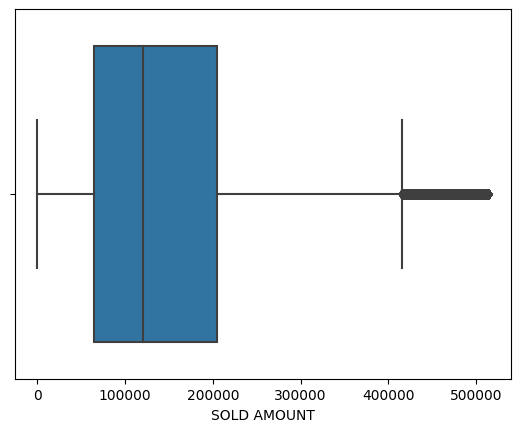

In [50]:
import seaborn as sns
sns.boxplot(x=new_df['SOLD AMOUNT'])

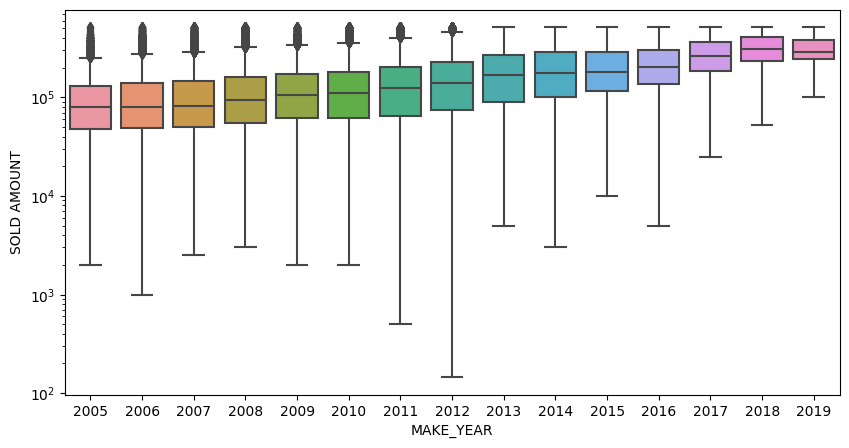

In [51]:
plt.figure(figsize=(10,5))
sns.boxplot(x='MAKE_YEAR',y='SOLD AMOUNT',data=new_df)
plt.yscale('log')
plt.show()

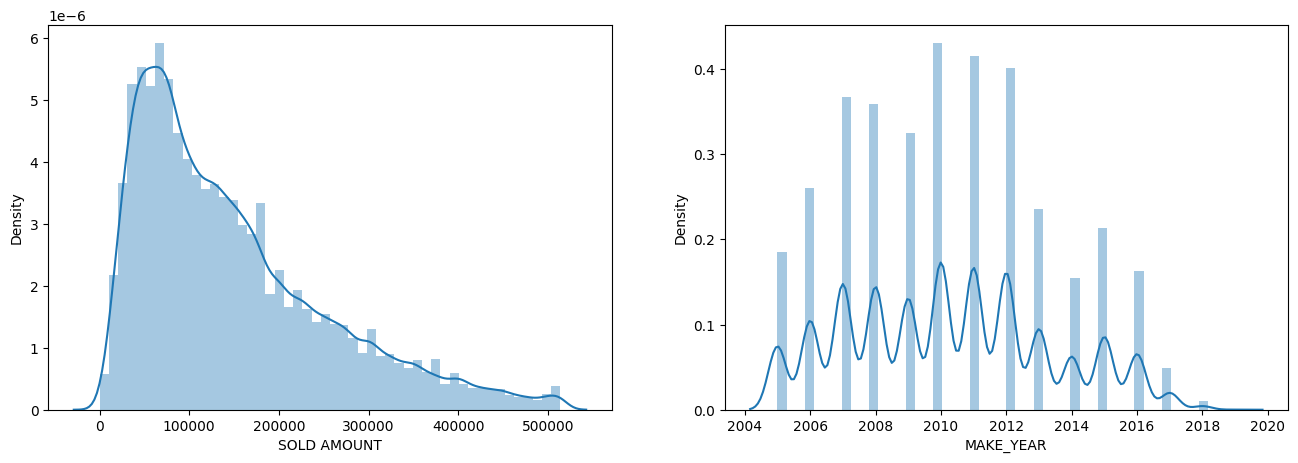

In [52]:
import warnings
warnings.filterwarnings('ignore')
plt.figure(figsize=(16,5))
plt.subplot(1,2,1)
sns.distplot(new_df['SOLD AMOUNT'])
plt.subplot(1,2,2)
sns.distplot(new_df['MAKE_YEAR'])
plt.show()

In [53]:
new_df.head(2)

,Make_Clean,Model_Clean,Variant_Clean,Fuel_Clean,MAKE_YEAR,SOLD AMOUNT,CV_State_Clean
0,TATA,SUMOVICTA,LX,DIESEL,2008,150000.000,ANDHRAPRADESH
1,MAHINDRA,BOLERO,SLX,DIESEL,2008,261000.000,ANDHRAPRADESH


In [54]:
new_df.columns=[c.replace(" ","_")for c in new_df.columns]

In [55]:
df4=new_df.drop(['SOLD_AMOUNT'],axis=1)

In [56]:
X=df4
y=new_df.SOLD_AMOUNT

In [77]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)

In [78]:
y_test

195777   150000.000
88108    108000.000
97965    133000.000
124442    75000.000
14279    190000.000
            ...    
103610    64000.000
119996    65000.000
2900     205000.000
55866     55000.000
38653     26000.000
Name: SOLD_AMOUNT, Length: 34578, dtype: float64

In [79]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import make_column_transformer
from sklearn.pipeline import make_pipeline
from sklearn.metrics import r2_score

In [80]:
ohe=OneHotEncoder()
ohe.fit(X[['Make_Clean','Model_Clean','Variant_Clean','Fuel_Clean','CV_State_Clean']])

OneHotEncoder()

In [81]:
column_trans=make_column_transformer((OneHotEncoder(categories=ohe.categories_),['Make_Clean','Model_Clean','Variant_Clean','Fuel_Clean','CV_State_Clean']),remainder='passthrough')

In [82]:
column_trans

ColumnTransformer(remainder='passthrough',
                  transformers=[('onehotencoder',
                                 OneHotEncoder(categories=[array(['ASHOKLEYLAND', 'CHEVROLET', 'DATSUN', 'FIAT', 'FORCEMOTORS',
       'FORD', 'HINDUSTANMOTORS', 'HONDA', 'HYUNDAI', 'MAHINDRA',
       'MAHINDRARENAULT', 'MARUTISUZUKI', 'MERCEDESBENZ', 'MITSUBISHI',
       'NISSAN', 'OPEL', 'PREMIER', 'RENAULT', 'SKODA', 'SONALIK', 'TATA',
       'TOYOTA', 'V...
       'HIMACHALPRADESH', 'JAMMUANDKASHMIR', 'JHARKHAND', 'KARNATAKA',
       'KERALA', 'MADHYAPRADESH', 'MAHARASHTRA', 'MANIPUR', 'MEGHALAYA',
       'MIZORAM', 'ODISHA', 'PUDUCHERRY', 'PUNJAB', 'RAJASTHAN', 'SIKKIM',
       'TAMILNADU', 'TELANGANA', 'TRIPURA', 'UTTARAKHAND', 'UTTARPRADESH',
       'WESTBENGAL'], dtype=object)]),
                                 ['Make_Clean', 'Model_Clean', 'Variant_Clean',
                                  'Fuel_Clean', 'CV_State_Clean'])])

In [83]:
from sklearn import model_selection
from xgboost import XGBRegressor

regressor=XGBRegressor(max_depth=15,learning_rate=0.001,
                   n_estimators=5000,
                   objective='reg:linear',
                   booster='gbtree')


# from sklearn import model_selection
# from xgboost import XGBRegressor

# model=XGBRegressor()

# n_estimators = [100, 500, 900, 1100, 1500]
# booster=['gbtree','gblinear']
# base_score=[0.25,0.5,0.75,1]
# parameters= n_estimators = [100, 500,900]
# max_depth = [2, 3, 5, 10, 15]
# # booster=['gbtree','gblinear']
# learning_rate=[0.05,0.1,0.15,0.20]
# min_child_weight=[1,2,3,4]



# # Define the grid of hyperparameters to search
# hyperparameter_grid = {
#     'n_estimators': n_estimators,
#     'max_depth':max_depth,
#     'learning_rate':learning_rate,
#     'min_child_weight':min_child_weight,
#     'booster':booster,
#     'base_score':base_score
#     }

# # Set up the random search with 5-fold cross validation
# from sklearn.model_selection import RandomizedSearchCV
# random_cv = RandomizedSearchCV(estimator=model,
#             param_distributions=hyperparameter_grid,                
#             cv=5, n_iter=50,
#             scoring = 'neg_mean_absolute_error',n_jobs = 4,
#             verbose = 5,
#             return_train_score = True,
#             random_state=42)

In [84]:
pipe=make_pipeline(column_trans,regressor)

In [85]:
pipe.fit(X_train,y_train)

[16:03:39] WARNING: C:/Users/administrator/workspace/xgboost-win64_release_1.6.0/src/objective/regression_obj.cu:203: reg:linear is now deprecated in favor of reg:squarederror.


Pipeline(steps=[('columntransformer',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('onehotencoder',
                                                  OneHotEncoder(categories=[array(['ASHOKLEYLAND', 'CHEVROLET', 'DATSUN', 'FIAT', 'FORCEMOTORS',
       'FORD', 'HINDUSTANMOTORS', 'HONDA', 'HYUNDAI', 'MAHINDRA',
       'MAHINDRARENAULT', 'MARUTISUZUKI', 'MERCEDESBENZ', 'MITSUBISHI',
       'NISSAN', 'OPEL', 'PREMIER', 'RENAULT'...
                              gamma=0, gpu_id=-1, grow_policy='depthwise',
                              importance_type=None, interaction_constraints='',
                              learning_rate=0.001, max_bin=256,
                              max_cat_to_onehot=4, max_delta_step=0,
                              max_depth=15, max_leaves=0, min_child_weight=1,
                              missing=nan, monotone_constraints='()',
                              n_estimators=5000, n_jobs=0, num_parallel_tree=1,
                              objective='reg:linear', predictor='auto',
                              random_state=0, reg_alpha=0, ...))])

In [86]:
y_pred=pipe.predict(X_test)
y_pred

array([128174.73,  91108.16, 130062.25, ..., 156253.27, 102342.69,
        80578.54], dtype=float32)

In [87]:
y_train_pred=pipe.predict(X_train)
y_train_pred

array([347940.03 ,  64475.418,  33950.746, ...,  87145.94 , 143719.14 ,
       151289.17 ], dtype=float32)

In [88]:
r2_score(y_train,y_train_pred)

0.7048844554849196

In [89]:
r2_score(y_test,y_pred)

0.67002281394489

In [90]:
df4.shape

(172886, 6)